In [11]:
import torch
import numpy as np

In [5]:
detections = torch.rand(10, 6)  # Random tensor to simulate detections
gt_boxes = torch.rand(5, 4)  # Random tensor to simulate ground truth boxes
gt_cls = torch.randint(0, 8, (5,))  # Random tensor to simulate ground truth classes

In [6]:
detections[:, 5].max()

tensor(0.9631)

In [14]:
target = np.ones(5)
prediction = np.array([0.1, 0.2, 0.8, 0.4, 0.7])

In [15]:
# pass the target and prediction to the roc_auc_score function
from sklearn.metrics import roc_auc_score
roc_auc_score(target, prediction)

c:\Users\sathish\miniconda3\envs\dl\lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


nan

In [10]:
import joblib
study = joblib.load('yolo11s bohb tune/optuna_study.pkl')
study.best_params

{'lr0': 0.00023758950881040344,
 'lrf': 0.1874268669033899,
 'weight_decay': 0.0004632250750446312,
 'warmup_momentum': 0.7510570837548393,
 'momentum': 0.8047785114774363}

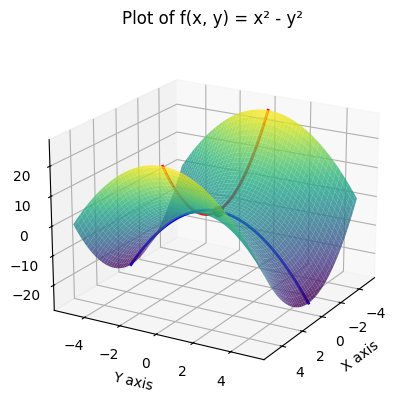

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a meshgrid for 3D plotting
X, Y = np.meshgrid(x, y)

# Compute the function values: f(x, y) = x^2 - y^2
Z = X**2 - Y**2

# Create a figure and a 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a colormap and transparency
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the cross-section along the x-axis (y = 0): z = x^2
ax.plot(x, np.zeros_like(x), x**2, color='red', linewidth=2, label='y = 0')

# Plot the cross-section along the y-axis (x = 0): z = -y^2
ax.plot(np.zeros_like(y), y, -y**2, color='blue', linewidth=2, label='x = 0')

# Mark the point at (0, 0, 0)
ax.scatter(0, 0, 0, color='black', s=50, label='(0, 0, 0)')

# Set labels for the axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set the title of the plot
ax.set_title('Plot of f(x, y) = x² - y²')

# Adjust the view angle for better visualization
ax.view_init(elev=20, azim=30)

# Display the plot
plt.show()

In [1]:
!pip install ConfigSpace

In [ ]:
import ConfigSpace as CS

# Create a configuration space
cs = CS.ConfigurationSpace()
cs.add_hyperparameter(CS.UniformFloatHyperparameter('lr0', lower=1e-4, upper=1e-3, log=True))
cs.add_hyperparameter(CS.UniformFloatHyperparameter('lrf', lower=0.01, upper=0.1, log=True))
cs.add_hyperparameter(CS.UniformFloatHyperparameter("weight_decay", lower=1e-4, upper=1e-2, log=True)))

C:\Users\sathish\AppData\Local\Temp\ipykernel_17472\116361991.py:5: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CS.UniformFloatHyperparameter('lr0', lower=1e-4, upper=1e-3, log=True))
C:\Users\sathish\AppData\Local\Temp\ipykernel_17472\116361991.py:6: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CS.UniformFloatHyperparameter('lrf', lower=0.01, upper=0.1, log=True))
C:\Users\sathish\AppData\Local\Temp\ipykernel_17472\116361991.py:7: DeprecationWarning: Please use `space.add(hyperparameter)`
  cs.add_hyperparameter(CS.UniformIntegerHyperparameter('batch_size', lower=16, upper=128))


UniformIntegerHyperparameter(name='batch_size', default_value=72, meta=None, size=113, lower=16, upper=128, log=False)

In [ ]:
import hpbandster.core.nameserver as hpns
import hpbandster.optimizers as hpo

# Start a nameserver
run_id = 'bohb_ADIS'
NS = hpns.NameServer(run_id=run_id, working_directory='.')
ns_host, ns_port = NS.start()

# Start a worker in the background
worker = MyWorker(nameserver=ns_host, nameserver_port=ns_port, run_id=run_id)
worker.run(background=True)

# Configure BOHB
bohb = hpo.BOHB(
    configspace=cs,
    run_id=run_id,
    nameserver=ns_host,
    nameserver_port=ns_port,
    min_budget=1,    # Minimum epochs per evaluation
    max_budget=10,   # Maximum epochs per evaluation
    eta=5            # Reduction factor for successive halving (default is 3)
)

# Run optimization (e.g., 4 iterations of HyperBand)
results = bohb.run(n_iterations=50)

# Shut down
bohb.shutdown(shutdown_workers=True)
NS.shutdown()

Configuration space object:
  Hyperparameters:
    batch_size, Type: UniformInteger, Range: [16, 128], Default: 72
    lr0, Type: UniformFloat, Range: [0.0001, 0.001], Default: 0.000316227766, on log-scale
    lrf, Type: UniformFloat, Range: [0.01, 0.1], Default: 0.0316227766017, on log-scale

In [ ]:
bohb.get